# QuTiP Test

## Verify Installation

In [ ]:
import qutip.testing as qt

In [ ]:
qt.run()

## Basic Operations

In [1]:
from qutip import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
vac = basis(5, 0)

In [54]:
vac

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]

In [59]:
a = destroy(5)
c = create(5)

In [63]:
a, c

(Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
 Qobj data =
 [[0.         1.         0.         0.         0.        ]
  [0.         0.         1.41421356 0.         0.        ]
  [0.         0.         0.         1.73205081 0.        ]
  [0.         0.         0.         0.         2.        ]
  [0.         0.         0.         0.         0.        ]],
 Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = False
 Qobj data =
 [[0.         0.         0.         0.         0.        ]
  [1.         0.         0.         0.         0.        ]
  [0.         1.41421356 0.         0.         0.        ]
  [0.         0.         1.73205081 0.         0.        ]
  [0.         0.         0.         2.         0.        ]])

In [75]:
np.sqrt(1/np.math.factorial(4)) * c ** 4 * vac

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]]

In [81]:
c * a * (c**3 * vac).unit()

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [3.]
 [0.]]

In [82]:
ket = basis(5, 2)

In [83]:
ket

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]]

In [84]:
n = num(5)

In [87]:
n * ket

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [2.]
 [0.]
 [0.]]

In [88]:
ket = (basis(5, 0) + basis(5, 1)).unit()

In [89]:
ket

Quantum object: dims = [[5], [1]], shape = (5, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]]

## Single Spin Time Evolution

In [308]:
H = 2 * np.pi * 0.1 * sigmax()

In [309]:
psi0 = basis(2, 0)

In [312]:
times = np.linspace(0.0, 10.0, 20)

In [314]:
result = mesolve(H, psi0, times, [], [sigmax(), sigmay(), sigmaz()])

In [318]:
result.states

[]

In [316]:
result.expect

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([ 0.00000000e+00, -6.14212640e-01, -9.69400240e-01, -9.15773457e-01,
        -4.75947849e-01,  1.64593874e-01,  7.35723339e-01,  9.96584419e-01,
         8.37167094e-01,  3.24700624e-01, -3.24698160e-01, -8.37165632e-01,
        -9.96584633e-01, -7.35725221e-01, -1.64596567e-01,  4.75945525e-01,
         9.15772479e-01,  9.69400830e-01,  6.14214701e-01,  2.77159958e-06]),
 array([ 1.        ,  0.78914057,  0.24548559, -0.40169513, -0.8794735 ,
        -0.98636142, -0.67728219, -0.08258023,  0.54694721,  0.94581685,
         0.94581769,  0.54694945, -0.08257765, -0.67728015, -0.98636097,
        -0.87947476, -0.40169736,  0.24548326,  0.78913896,  1.        ])]

## Spin Chain

H=−12∑nNhnσz(n)−12∑nN−1[J(n)xσx(n)σx(n+1)+J(n)yσy(n)σy(n+1)+J(n)zσz(n)σz(n+1)]

In [105]:
def integrate(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # construct the hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H += - 0.5 * h[n] * sz_list[n]

    # interaction terms
    for n in range(N-1):
        H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
        H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [106]:
#
# set up the calculation
#
#solver = "me"   # use the ode solver
solver = "mc"   # use the monte-carlo solver

N = 10            # number of spins

# array of spin energy splittings and coupling strengths. here we use
# uniform parameters, but in general we don't have too
h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = 0.1 * 2 * np.pi * np.ones(N)
Jx = 0.1 * 2 * np.pi * np.ones(N)
Jy = 0.1 * 2 * np.pi * np.ones(N)
# dephasing rate
gamma = 0.01 * np.ones(N)

# intial state, first and last spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,0))
for n in range(N-1):
    psi_list.append(basis(2,0))
#psi_list.append(basis(2,1))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 40, 1000)

sz_expt = integrate(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver)

10.0%. Run time:   7.23s. Est. time left: 00:00:01:05
20.0%. Run time:  12.99s. Est. time left: 00:00:00:51
30.0%. Run time:  18.99s. Est. time left: 00:00:00:44
40.0%. Run time:  25.32s. Est. time left: 00:00:00:37
50.0%. Run time:  31.84s. Est. time left: 00:00:00:31
60.0%. Run time:  37.99s. Est. time left: 00:00:00:25
70.0%. Run time:  43.43s. Est. time left: 00:00:00:18
80.0%. Run time:  49.56s. Est. time left: 00:00:00:12
90.0%. Run time:  56.43s. Est. time left: 00:00:00:06
100.0%. Run time:  62.76s. Est. time left: 00:00:00:00
Total run time:  62.79s


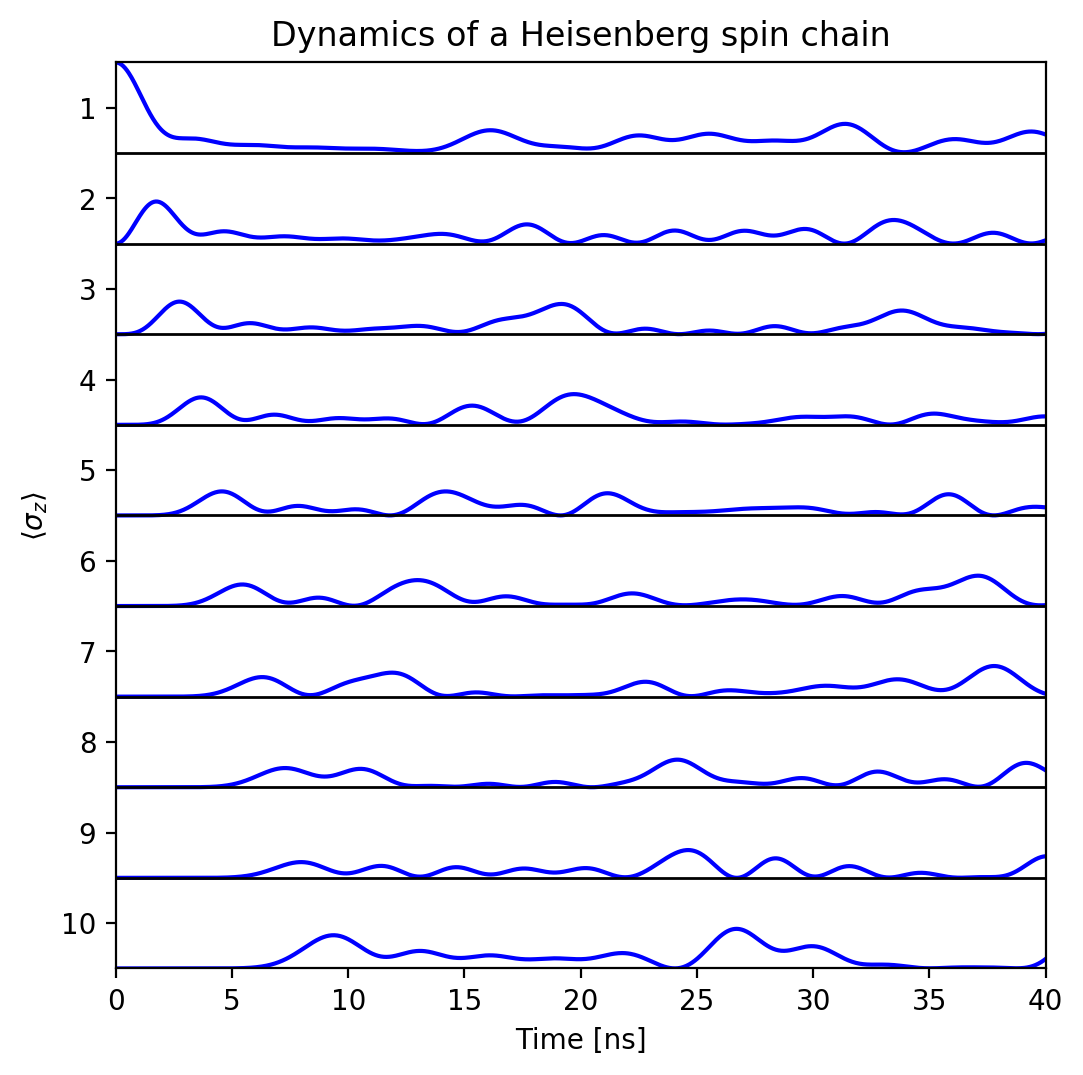

In [371]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, -np.real(sz_expt[n]) - 2 * n, color = 'b', label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)
    ax.plot([tlist[0],tlist[-1]], [- 2 * n - 1, - 2 * n - 1], linewidth = 1, color = 'k')

#ax.legend(loc=0)
ax.set_xlim(tlist[0],tlist[-1])
ax.set_ylim(- 2 * n - 1,1)
ax.set_yticks(np.arange(- 2 * n, 1, 2))
ax.set_yticklabels([f"{N - n}" for n in range(N)])
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain');
plt.show()

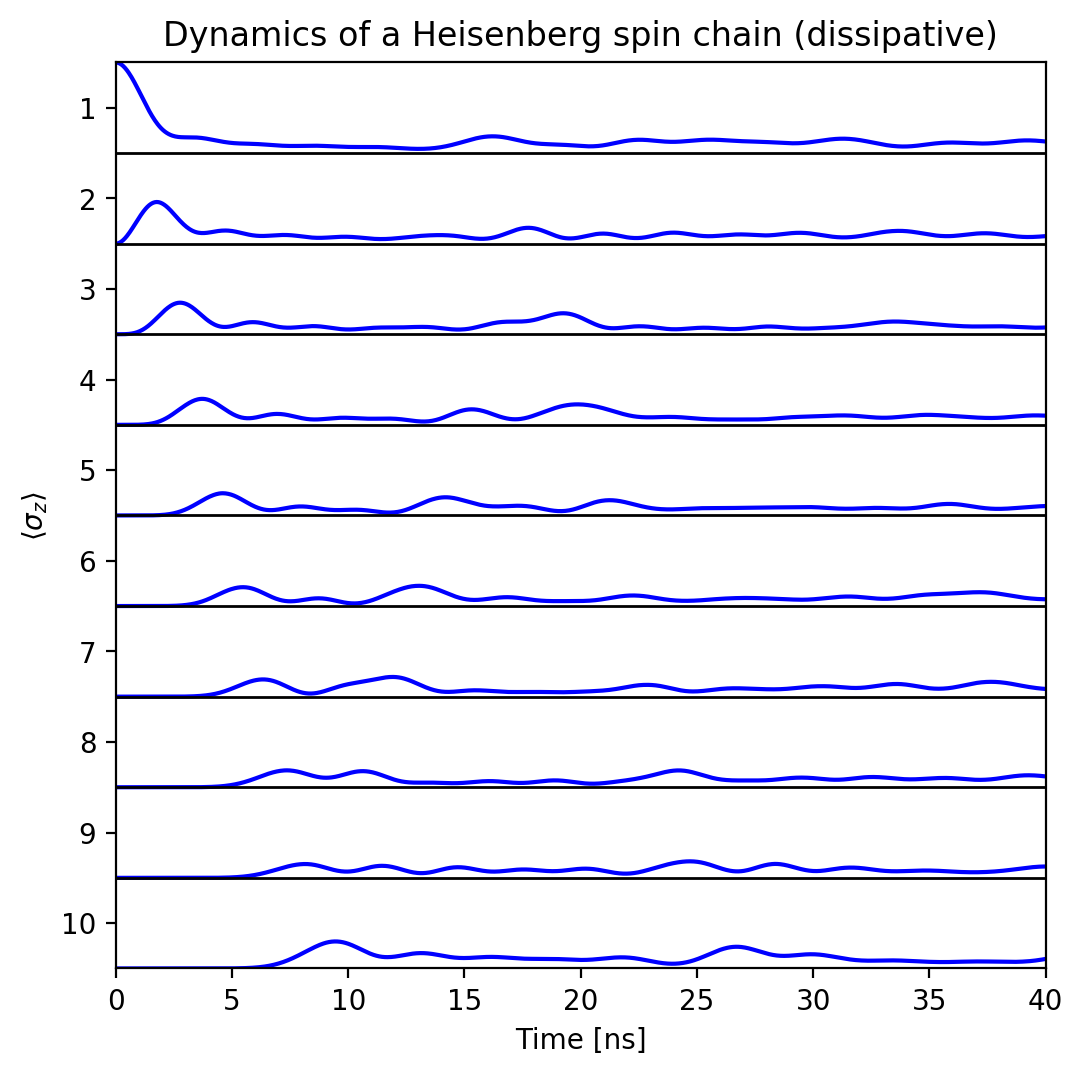

In [373]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, -np.real(sz_expt[n]) - 2 * n, color = 'b', label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)
    ax.plot([tlist[0],tlist[-1]], [- 2 * n - 1, - 2 * n - 1], linewidth = 1, color = 'k')

#ax.legend(loc=0)
ax.set_xlim(tlist[0],tlist[-1])
ax.set_ylim(- 2 * n - 1,1)
ax.set_yticks(np.arange(- 2 * n, 1, 2))
ax.set_yticklabels([f"{N - n}" for n in range(N)])
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain (dissipative)');
plt.show()

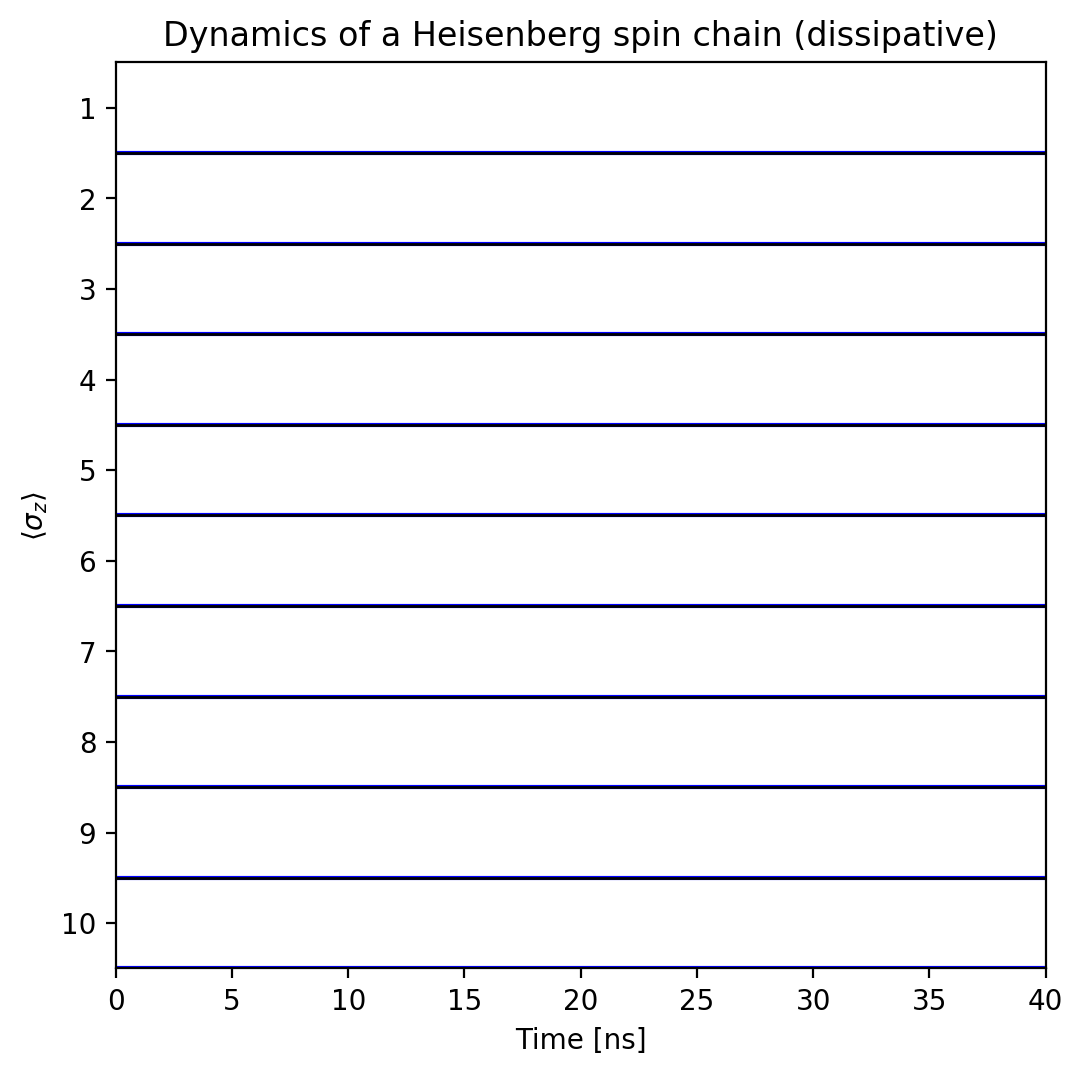

In [107]:
fig, ax = plt.subplots(figsize=(6,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, -np.real(sz_expt[n]) - 2 * n, color = 'b', label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)
    ax.plot([tlist[0],tlist[-1]], [- 2 * n - 1, - 2 * n - 1], linewidth = 1, color = 'k')

#ax.legend(loc=0)
ax.set_xlim(tlist[0],tlist[-1])
ax.set_ylim(- 2 * n - 1,1)
ax.set_yticks(np.arange(- 2 * n, 1, 2))
ax.set_yticklabels([f"{N - n}" for n in range(N)])
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain (dissipative)');
plt.show()

In [297]:
#
# set up the calculation
#
#solver = "me"   # use the ode solver
solver = "mc"   # use the monte-carlo solver

N = 5            # number of spins

# array of spin energy splittings and coupling strengths. here we use
# uniform parameters, but in general we don't have too
h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = -0.1 * 2 * np.pi * np.ones(N)
Jx = -0.1 * 2 * np.pi * np.ones(N)
Jy = -0.1 * 2 * np.pi * np.ones(N)
# dephasing rate
gamma = 0.01 * np.ones(N)

# intial state, first spin in state |1>, the rest in state |0>
psi_list = []
psi_list.append(basis(2,1))
for n in range(N-1):
    psi_list.append(basis(2,n%2))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 500, 200)

sz_expt = integrate(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver)

10.0%. Run time:   2.32s. Est. time left: 00:00:00:20
20.0%. Run time:   4.29s. Est. time left: 00:00:00:17
30.0%. Run time:   6.14s. Est. time left: 00:00:00:14
40.0%. Run time:   7.99s. Est. time left: 00:00:00:11
50.0%. Run time:   9.95s. Est. time left: 00:00:00:09
60.0%. Run time:  11.76s. Est. time left: 00:00:00:07
70.0%. Run time:  13.62s. Est. time left: 00:00:00:05
80.0%. Run time:  15.71s. Est. time left: 00:00:00:03
90.0%. Run time:  17.79s. Est. time left: 00:00:00:01
100.0%. Run time:  20.21s. Est. time left: 00:00:00:00
Total run time:  20.30s


In [299]:
si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

# construct the hamiltonian
H = 0

# energy splitting terms
for n in range(N):
    H += - 0.5 * h[n] * sz_list[n]

# interaction terms
for n in range(N-1):
    H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
    H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
    H += - 0.5 * Jz[n] * sz_list[n] * sz_list[n+1]

# collapse operators
c_op_list = []

# spin dephasing
for n in range(N):
    if gamma[n] > 0.0:
        c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])

In [307]:
final_state = steadystate(H, c_op_list)
fexpt = expect(sx_list, final_state)
fexpt

array([0., 0., 0., 0., 0.])

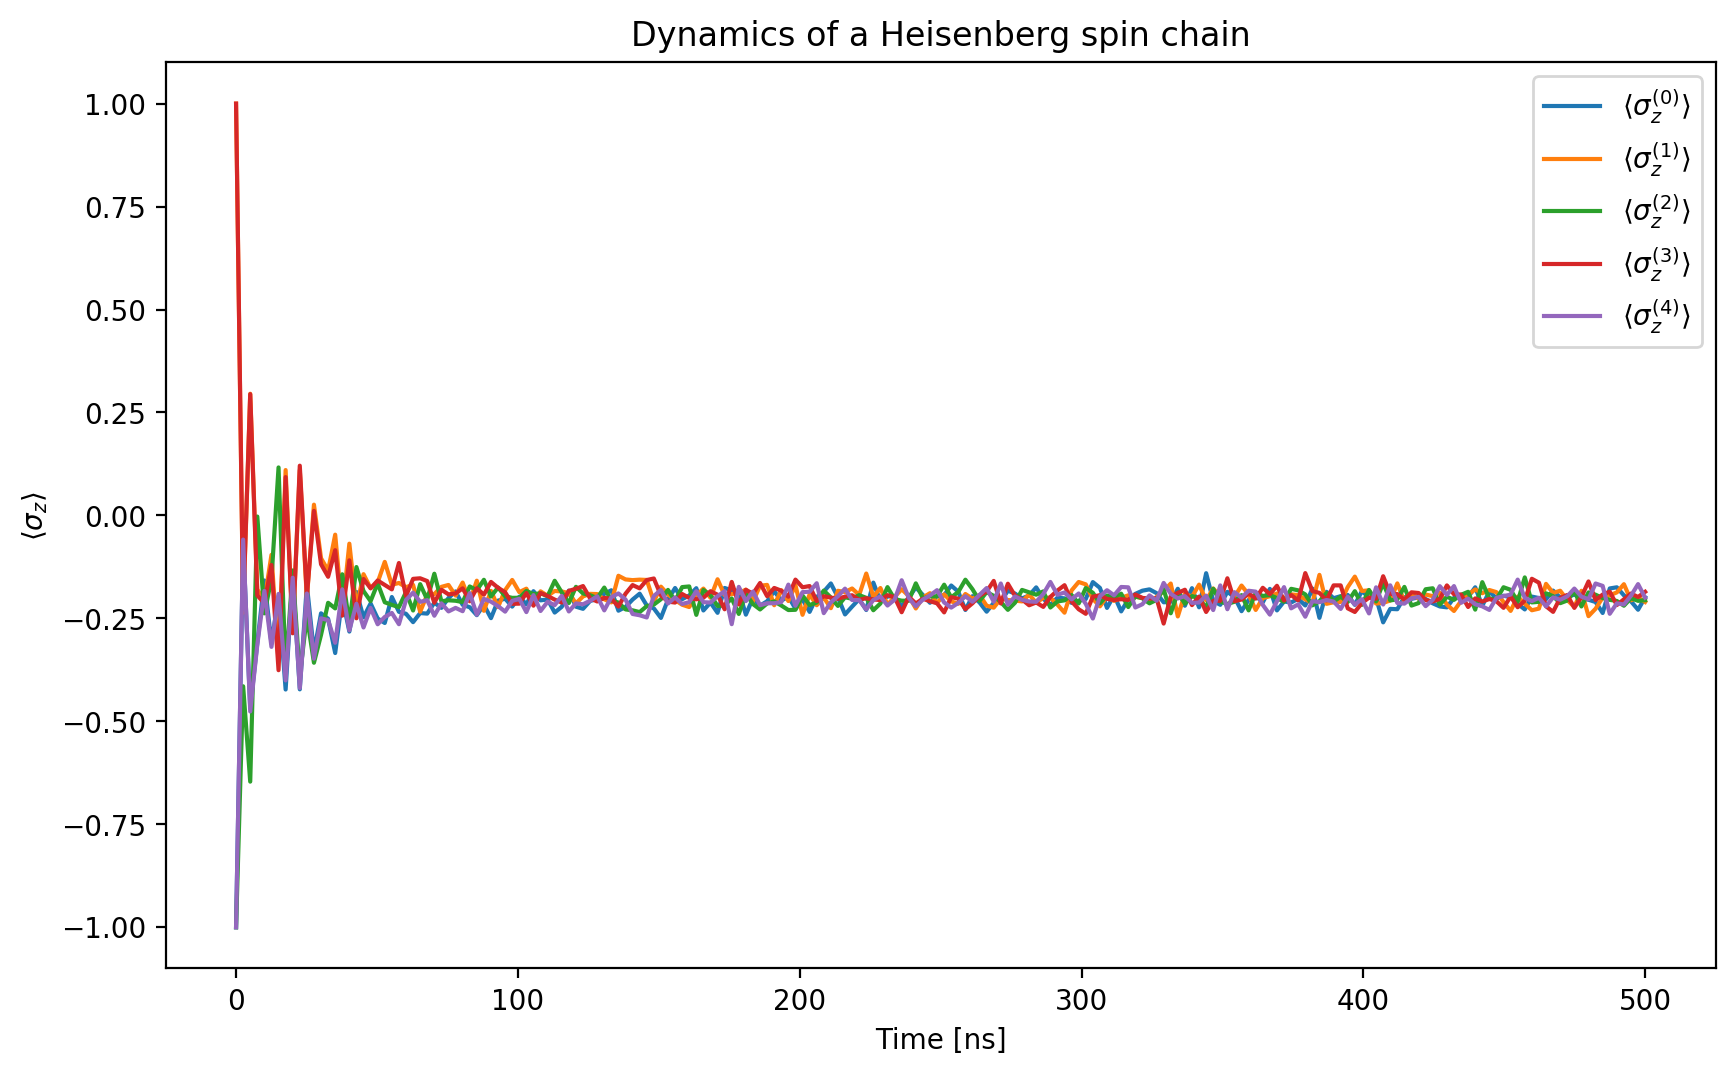

In [298]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain');

In [143]:
np.random.randint(2)

1

In [156]:
#
# set up the calculation
#
#solver = "me"   # use the ode solver
solver = "mc"   # use the monte-carlo solver

N = 10            # number of spins

# array of spin energy splittings and coupling strengths. here we use
# uniform parameters, but in general we don't have too
h  = 1.0 * 2 * np.pi * np.ones(N) 
Jz = -0.2 * 2 * np.pi * np.ones(N)
Jx = -0.2 * 2 * np.pi * np.ones(N)
Jy = -0.2 * 2 * np.pi * np.ones(N)
# dephasing rate
gamma = 0.01 * np.ones(N)

# intial state, spin in random state |1> or |0>
psi_list = []
#psi_list.append(basis(2,1))
for n in range(N):
    psi_list.append(basis(2, np.random.randint(2)))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 30, 200)

sz_expt = integrate(N, h, Jx, Jy, Jz, psi0, tlist, gamma, solver)

10.0%. Run time:   2.83s. Est. time left: 00:00:00:25
20.0%. Run time:   5.20s. Est. time left: 00:00:00:20
30.0%. Run time:   7.44s. Est. time left: 00:00:00:17
40.0%. Run time:   9.86s. Est. time left: 00:00:00:14
50.0%. Run time:  12.28s. Est. time left: 00:00:00:12
60.0%. Run time:  14.48s. Est. time left: 00:00:00:09
70.0%. Run time:  16.77s. Est. time left: 00:00:00:07
80.0%. Run time:  19.41s. Est. time left: 00:00:00:04
90.0%. Run time:  22.41s. Est. time left: 00:00:00:02
100.0%. Run time:  25.06s. Est. time left: 00:00:00:00
Total run time:  25.09s


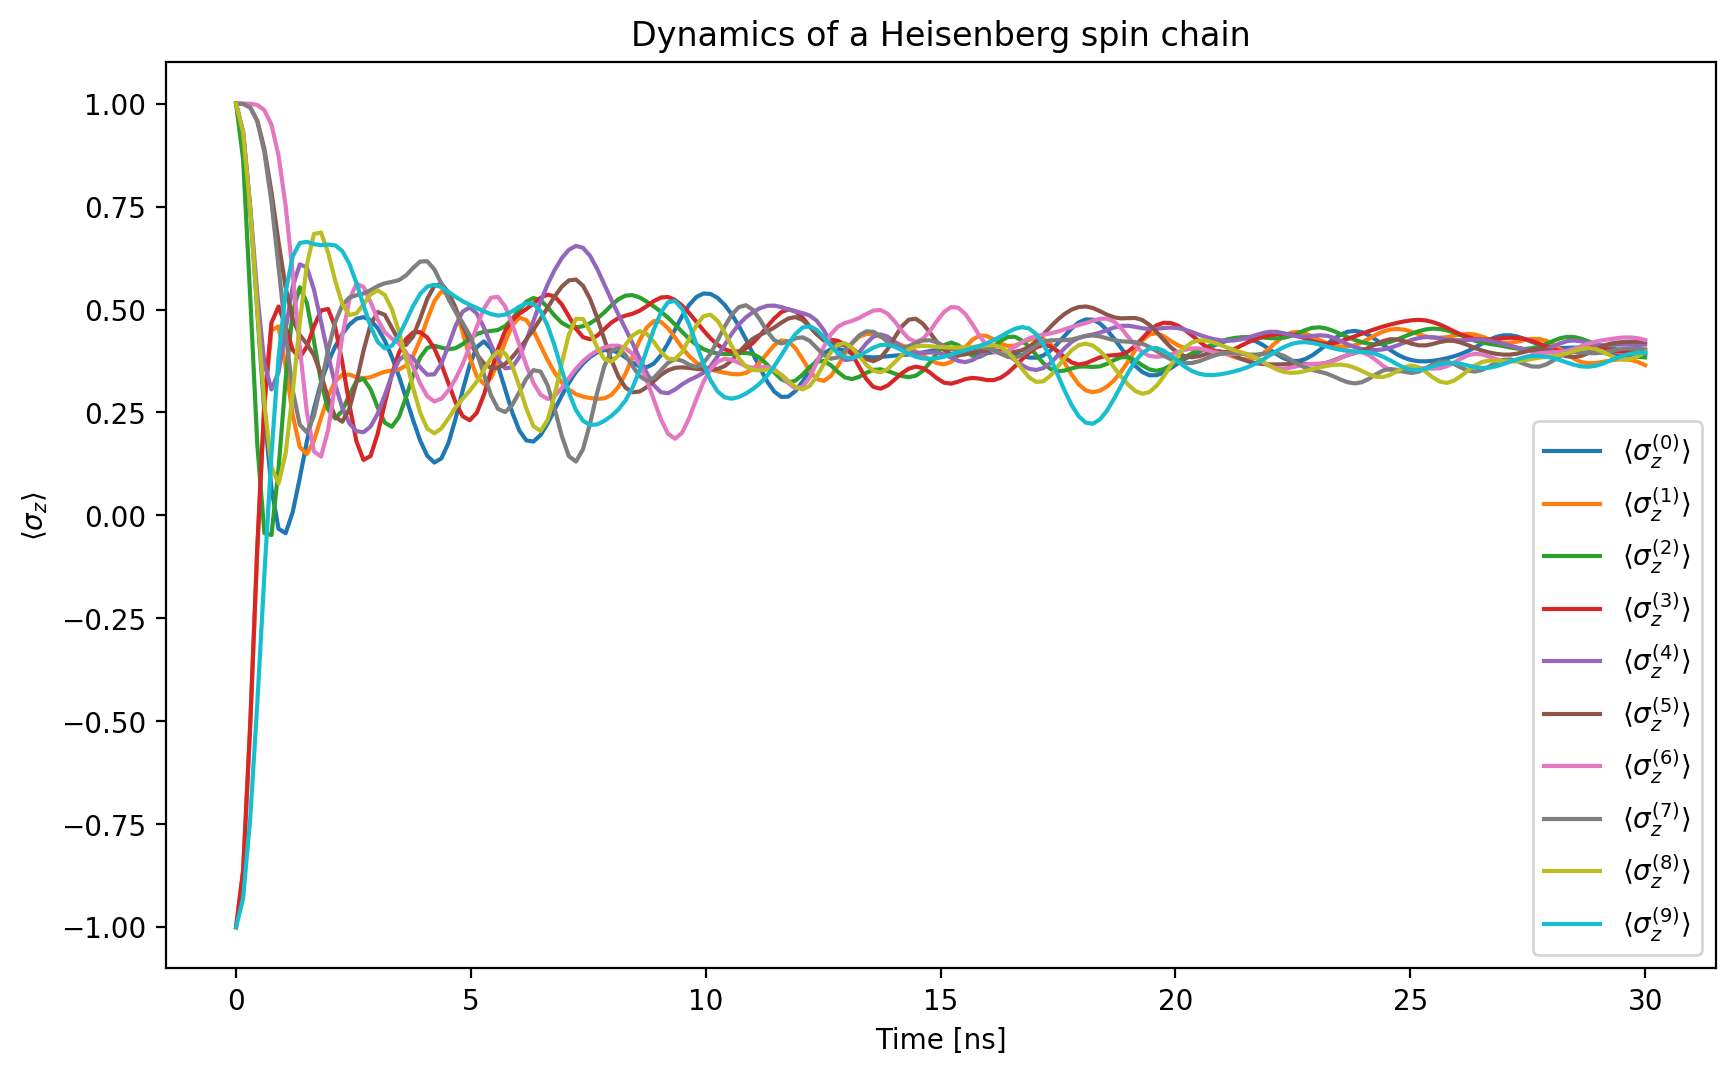

In [157]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain');

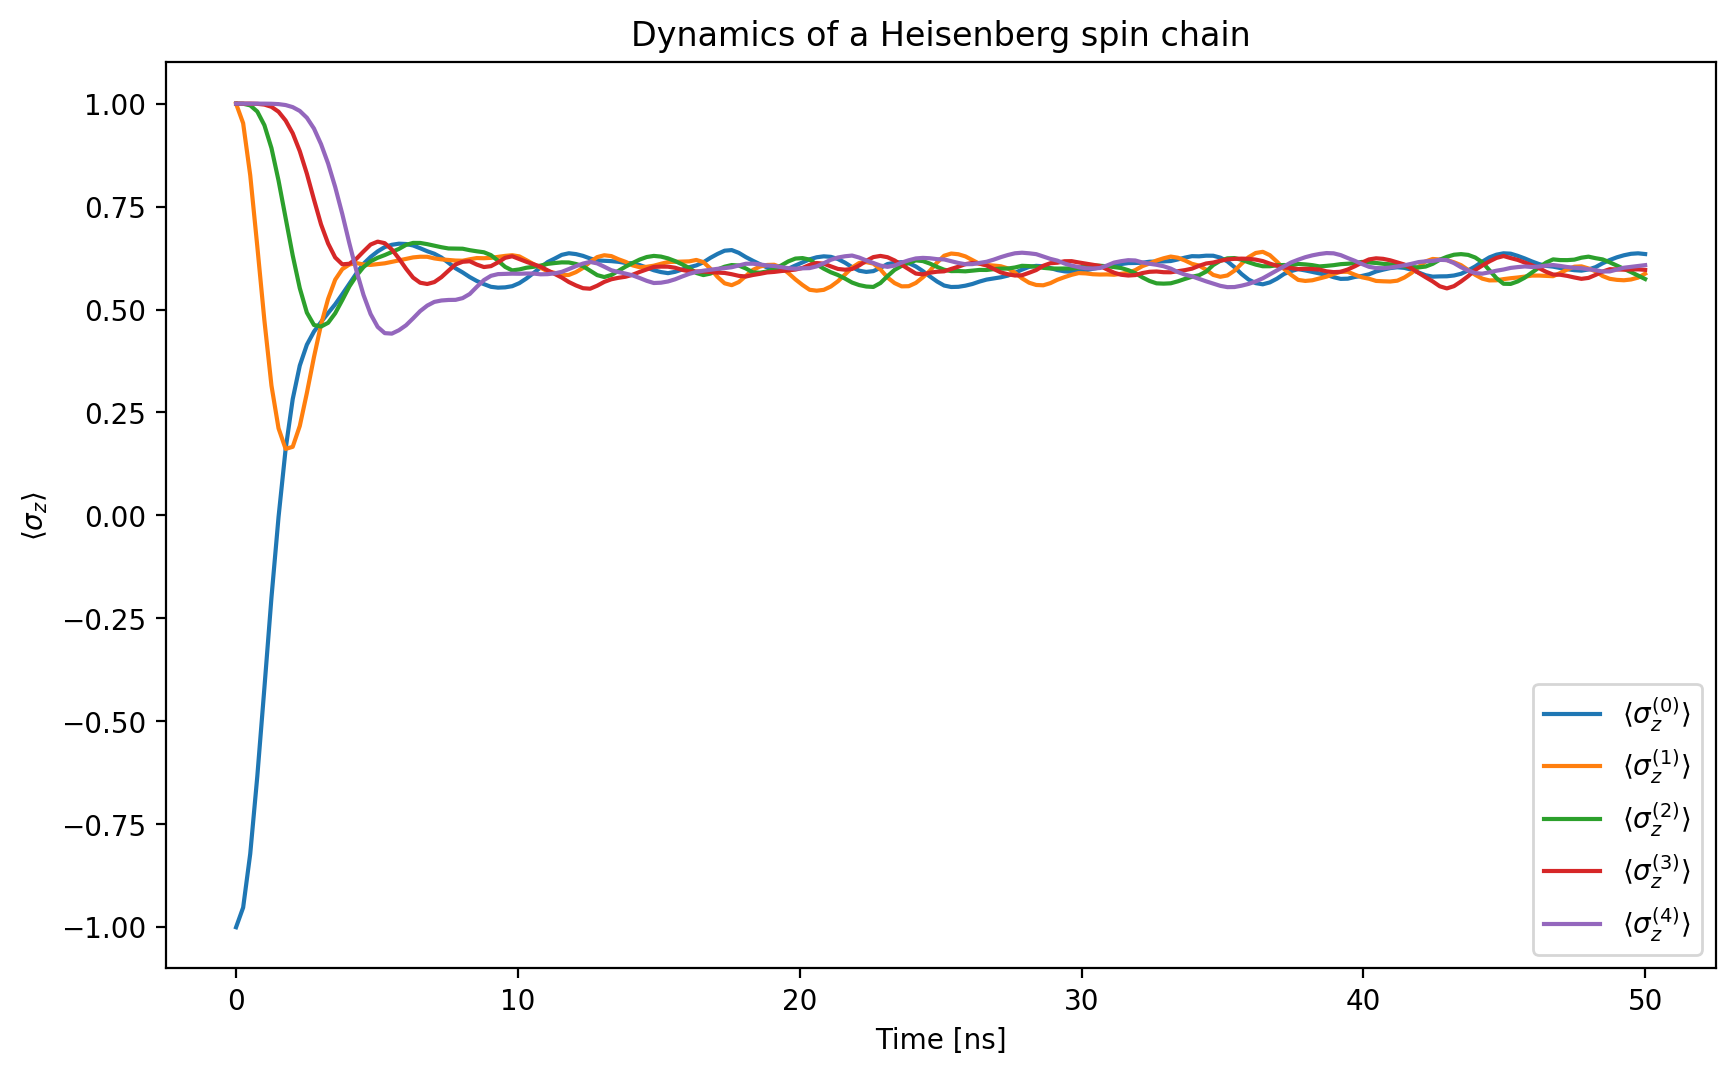

In [111]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of a Heisenberg spin chain');

In [158]:
si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

In [161]:
sz_list[-1]

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (1024, 1024), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0. -1.]]

In [163]:
op_list

[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj data =
 [[1. 0.]
  [0. 1.]],
 Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
 Qobj dat

In [185]:
def TFIM(N, h, Jz, psi0, tlist, gamma, solver):

    si = qeye(2)
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()

    sx_list = []
    sy_list = []
    sz_list = []

    for n in range(N):
        op_list = []
        for m in range(N):
            op_list.append(si)

        op_list[n] = sx
        sx_list.append(tensor(op_list))

        op_list[n] = sy
        sy_list.append(tensor(op_list))

        op_list[n] = sz
        sz_list.append(tensor(op_list))

    # construct the hamiltonian
    H = 0

    # energy splitting terms
    for n in range(N):
        H += - 1.0 * h[n] * sx_list[n]

    # interaction terms
    for n in range(N-1):
#         H += - 0.5 * Jx[n] * sx_list[n] * sx_list[n+1]
#         H += - 0.5 * Jy[n] * sy_list[n] * sy_list[n+1]
        H += - 1.0 * Jz[n] * sz_list[n] * sz_list[n+1]

    # collapse operators
    c_op_list = []

    # spin dephasing
    for n in range(N):
        if gamma[n] > 0.0:
            c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])

    # evolve and calculate expectation values
    if solver == "me":
        result = mesolve(H, psi0, tlist, c_op_list, sz_list)
    elif solver == "mc":
        ntraj = 250 
        result = mcsolve(H, psi0, tlist, c_op_list, sz_list, ntraj)

    return result.expect

In [187]:
#
# set up the calculation
#
#solver = "me"   # use the ode solver
solver = "mc"   # use the monte-carlo solver

N = 5            # number of spins

# array of spin energy splittings and coupling strengths. here we use
# uniform parameters, but in general we don't have too
h  = 1 * np.pi * np.ones(N) 
Jz = 1 * np.pi * np.ones(N)
Jx = 1 * np.pi * np.ones(N)
Jy = 1 * np.pi * np.ones(N)
# dephasing rate
gamma = 0.001 * np.ones(N)

# intial state, spin in random state |1> or |0>
psi_list = []
#psi_list.append(basis(2,1))
for n in range(N):
    psi_list.append(basis(2, np.random.randint(2)))
psi0 = tensor(psi_list)

tlist = np.linspace(0, 300, 200)

sz_expt = TFIM(N, h, Jz, psi0, tlist, gamma, solver)

10.0%. Run time:   5.94s. Est. time left: 00:00:00:53
20.0%. Run time:  10.78s. Est. time left: 00:00:00:43
30.0%. Run time:  15.11s. Est. time left: 00:00:00:35
40.0%. Run time:  19.53s. Est. time left: 00:00:00:29
50.0%. Run time:  24.23s. Est. time left: 00:00:00:24
60.0%. Run time:  28.75s. Est. time left: 00:00:00:19
70.0%. Run time:  33.21s. Est. time left: 00:00:00:14
80.0%. Run time:  37.64s. Est. time left: 00:00:00:09
90.0%. Run time:  42.35s. Est. time left: 00:00:00:04
100.0%. Run time:  46.78s. Est. time left: 00:00:00:00
Total run time:  46.83s


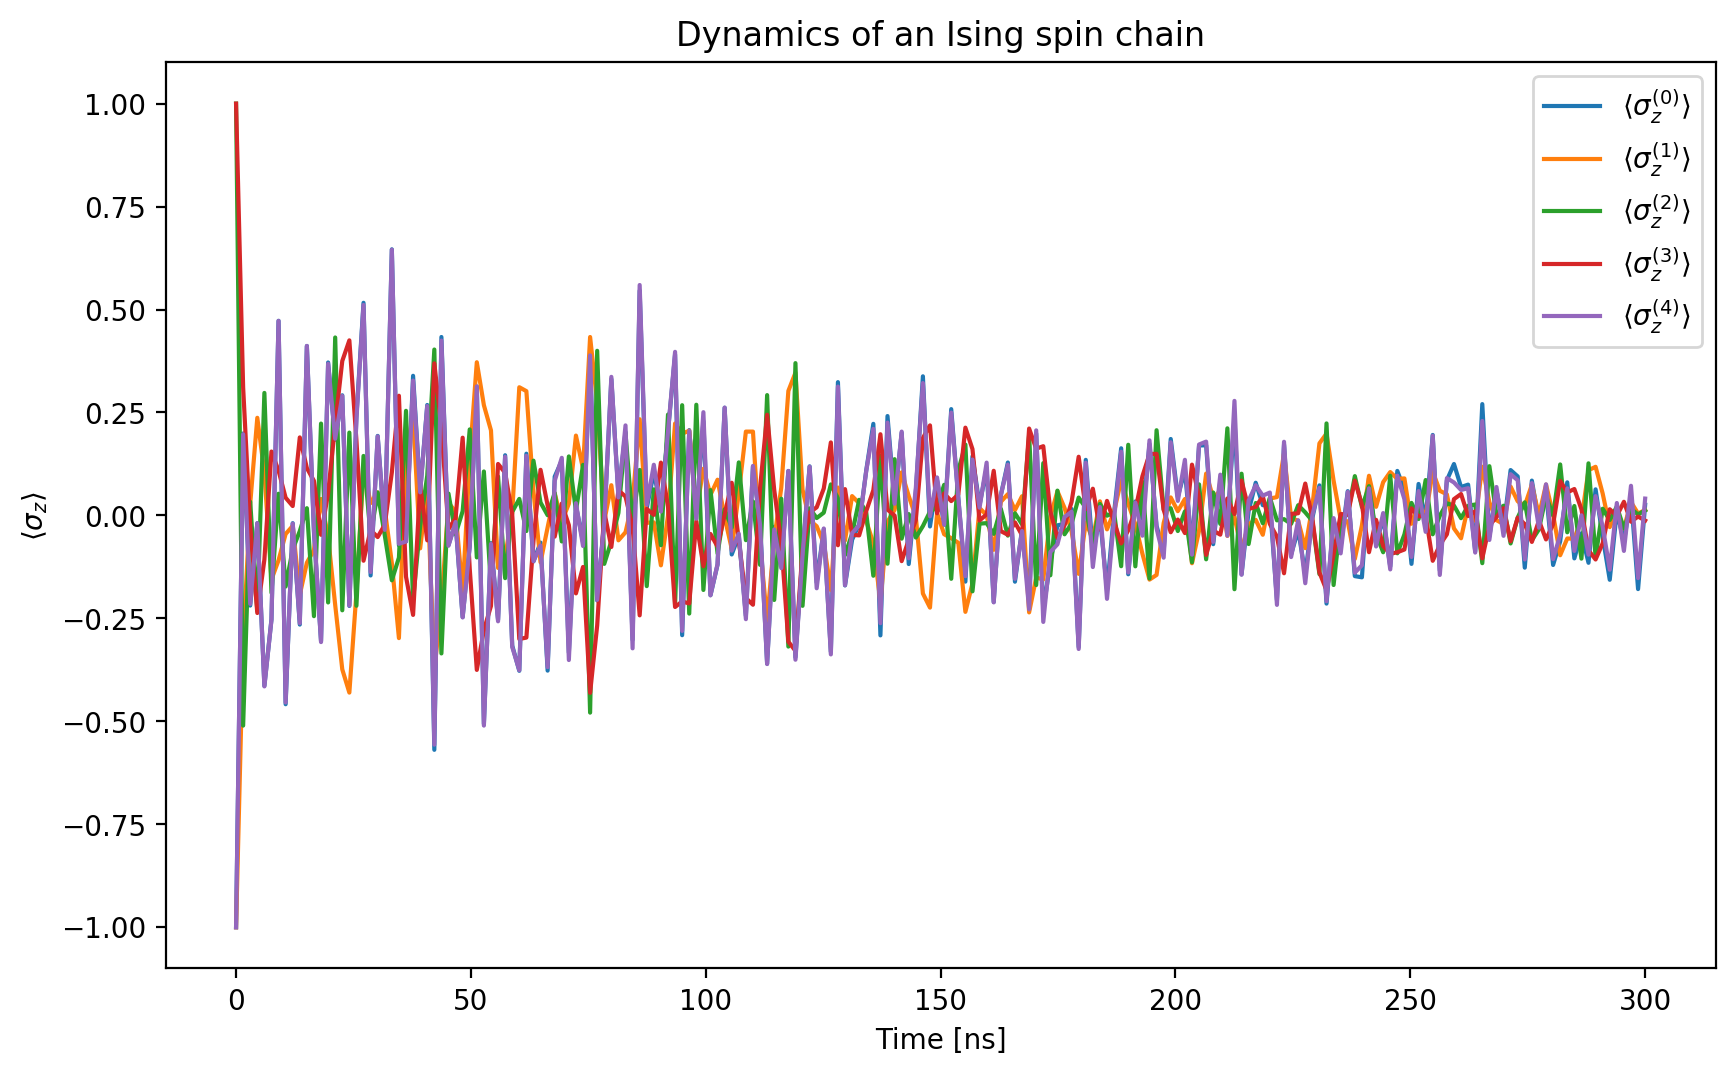

In [188]:
fig, ax = plt.subplots(figsize=(10,6), dpi = 200)

for n in range(N):
    ax.plot(tlist, np.real(sz_expt[n]), label=r'$\langle\sigma_z^{(%d)}\rangle$'%n)

ax.legend(loc=0)
ax.set_xlabel(r'Time [ns]')
ax.set_ylabel(r'$\langle\sigma_z\rangle$')
ax.set_title(r'Dynamics of an Ising spin chain');

In [210]:
N = 7
# parameters
h  = 0 * np.pi * np.ones(N) 
Jz = 1 * np.ones(N)
Jx = 1 * np.ones(N)
Jy = 1 * np.ones(N)
# dephasing rate
gamma = 0.01 * np.ones(N)

si = qeye(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

sx_list = []
sy_list = []
sz_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)

    op_list[n] = sx
    sx_list.append(tensor(op_list))

    op_list[n] = sy
    sy_list.append(tensor(op_list))

    op_list[n] = sz
    sz_list.append(tensor(op_list))

# construct the hamiltonian
H = 0

# energy splitting terms
for n in range(N):
    H += - 0.5 * h[n] * sz_list[n]

# interaction terms
for n in range(N-1):
    H += - Jx[n] * sx_list[n] * sx_list[n+1]
    H += - Jy[n] * sy_list[n] * sy_list[n+1]
    H += - Jz[n] * sz_list[n] * sz_list[n+1]

# collapse operators
c_op_list = []

# spin dephasing
for n in range(N):
    if gamma[n] > 0.0:
        c_op_list.append(np.sqrt(gamma[n]) * sz_list[n])

In [211]:
final_state = steadystate(H, c_op_list)
fexpt = expect(sz_list, final_state)
fexpt

array([-1., -1., -1., -1., -1., -1., -1.])

In [202]:
final_state

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

In [203]:
H

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.  0.  0.  0.]
 [ 0.  1. -2.  0.]
 [ 0. -2.  1.  0.]
 [ 0.  0.  0. -1.]]

In [204]:
H.eigenenergies()

array([-1., -1., -1.,  3.])

In [207]:
H.eigenstates()[1][2]

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]]

In [136]:
expect(sz_list, H.eigenstates()[1][3])

array([-1., -1.])

In [194]:
expect(H, a)

-2.0000000000000004